In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Taxifare.csv")

In [3]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
data.isna().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [5]:
data["date_time_of_pickup"] = pd.to_datetime(data["date_time_of_pickup"])

In [6]:
data["year"] = data["date_time_of_pickup"].dt.year
data["month"] = data["date_time_of_pickup"].dt.month
data["Day"] = data["date_time_of_pickup"].dt.day
data["hour"] = data["date_time_of_pickup"].dt.hour
data["minute"] = data["date_time_of_pickup"].dt.minute
data["day_of_week"] = data["date_time_of_pickup"].dt.dayofweek

In [7]:
data

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,Day,hour,minute,day_of_week
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,23,25,2
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,17,19,0
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,4,53,6
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,7,9,1


In [8]:
data["no_of_passenger"].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

In [9]:
data["no_of_passenger"] = data["no_of_passenger"].replace(0 , data["no_of_passenger"].mode()[0])

<Axes: xlabel='amount', ylabel='no_of_passenger'>

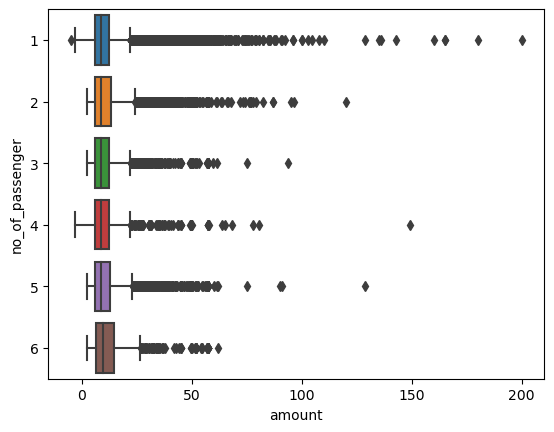

In [10]:
sns.boxplot(y="no_of_passenger" , x = "amount" , data = data , orient = "h")

In [11]:
data.drop("date_time_of_pickup" , axis = 1 , inplace = True)

In [12]:
data

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,Day,hour,minute,day_of_week
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,0
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,1
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,3
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,5
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,23,25,2
49996,19:18.0,7.5,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,17,19,0
49997,53:00.0,6.9,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,4,53,6
49998,09:00.0,4.5,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,7,9,1


In [13]:
data

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,Day,hour,minute,day_of_week
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,0
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,1
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,3
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,5
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,23,25,2
49996,19:18.0,7.5,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,17,19,0
49997,53:00.0,6.9,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,4,53,6
49998,09:00.0,4.5,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,7,9,1


<Axes: xlabel='amount', ylabel='year'>

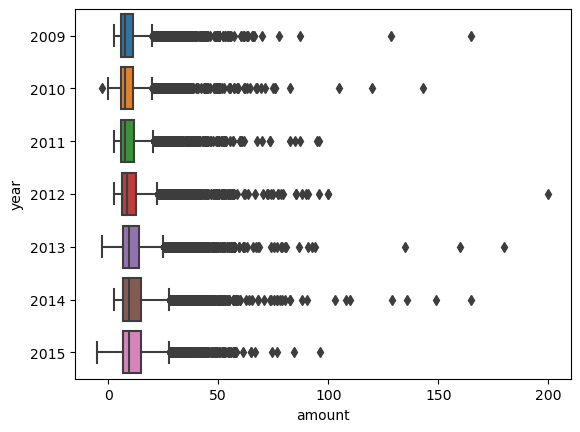

In [14]:
sns.boxplot(y = "year" , x = "amount" , data = data , orient = "h")

<Axes: xlabel='month', ylabel='no_of_passenger'>

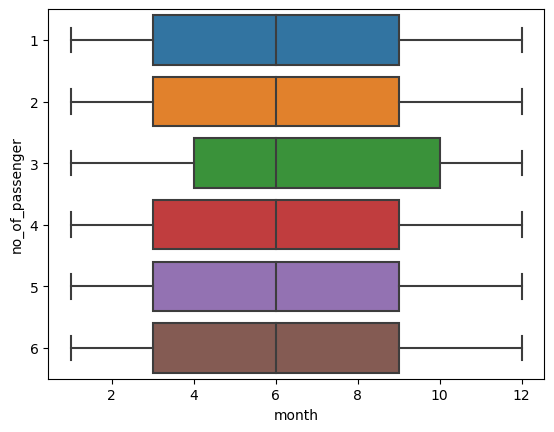

In [15]:
sns.boxplot(y = "no_of_passenger" , x = "month" , data = data , orient = "h")

<Axes: xlabel='day_of_week', ylabel='no_of_passenger'>

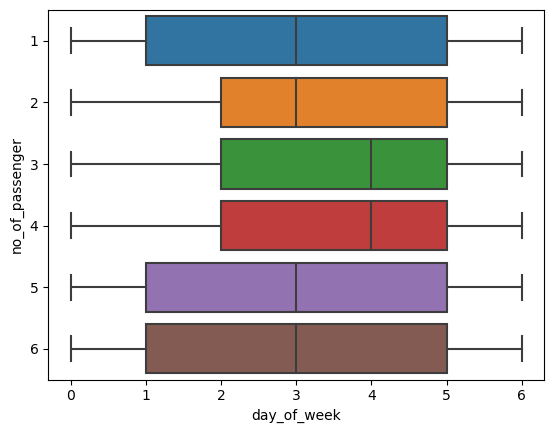

In [16]:
sns.boxplot(y = "no_of_passenger" , x = "day_of_week" , data = data , orient = "h")

<Axes: xlabel='month', ylabel='no_of_passenger'>

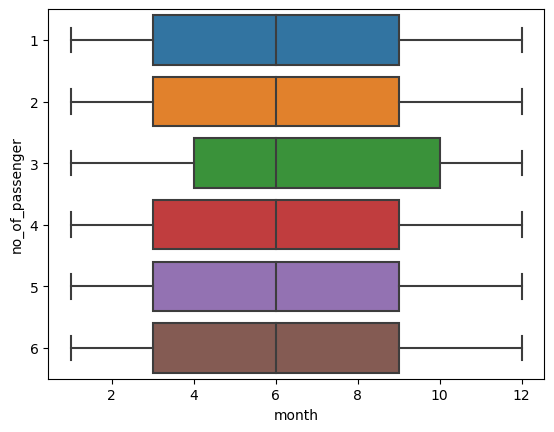

In [17]:
sns.boxplot(y = "no_of_passenger" , x = "month" , data = data , orient = "h")

<Axes: xlabel='hour', ylabel='no_of_passenger'>

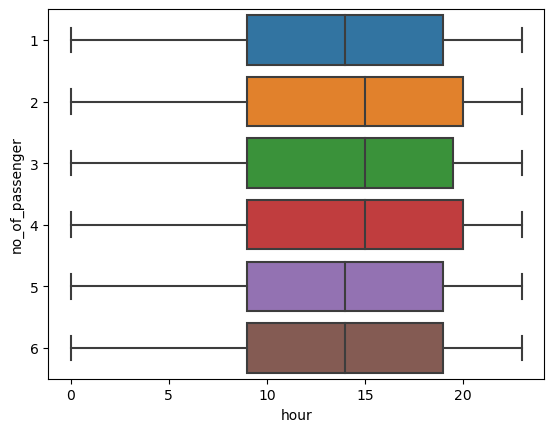

In [18]:
sns.boxplot(y = "no_of_passenger" , x = "hour" , data = data , orient = "h")

<Axes: xlabel='amount', ylabel='hour'>

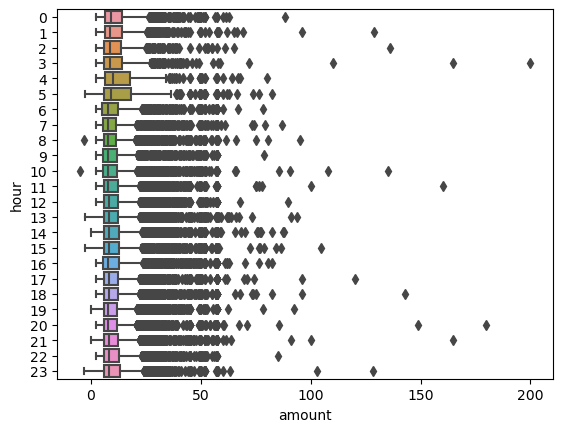

In [19]:
sns.boxplot(y = "hour" , x = "amount" , data = data , orient = "h")

In [20]:
#///////////////////////////////////////////////////

In [21]:
# Calculating distance based on latitude and longitude

In [22]:
def hav_dist(lat1 , lon1 , lat2 , lon2):
    dLat = np.radians(lat2-lat1)
    dLon = np.radians(lon2-lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    
    a = (np.sin(dLat / 2)**2 + np.sin(dLon)**2*np.cos(lat1)*np.cos(lat2))
    rad = 6371 #earth radius
    c = 2*np.arcsin(np.sqrt(a))
    
    distance = rad*c
    return distance

In [23]:
data.columns

Index(['unique_id', 'amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'year', 'month', 'Day', 'hour', 'minute', 'day_of_week'],
      dtype='object')

In [24]:
# adding a new feature  distance to each row
data["distance"] = hav_dist(data['longitude_of_pickup'], data['latitude_of_pickup'],data['longitude_of_dropoff'],data['latitude_of_dropoff'])

In [25]:
data.head()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,Day,hour,minute,day_of_week,distance
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,0,0.635013
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,1,5.959365
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,3,1.151387
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,5,1.607903
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,1,1.598443


In [26]:
df = data.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_2168\2669331763.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = data.corr()


In [27]:
data.isna().sum()

unique_id               0
amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
year                    0
month                   0
Day                     0
hour                    0
minute                  0
day_of_week             0
distance                0
dtype: int64

<Axes: xlabel='distance', ylabel='amount'>

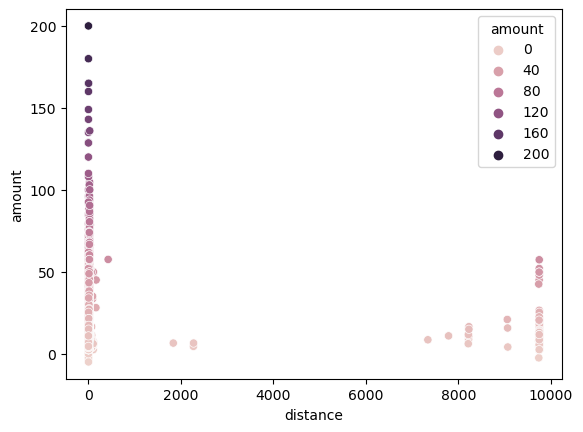

In [28]:
sns.scatterplot( x = data["distance"] , y = data["amount"], hue = data["amount"])

In [29]:
data.drop(["unique_id"],axis = 1,inplace = True)
data.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,Day,hour,minute,day_of_week,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,0,0.635013
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,1,5.959365
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,3,1.151387
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,5,1.607903
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,1,1.598443


In [30]:
# Feature selection using Random forest

In [31]:
x =data.drop(['amount'],axis = 1)
y=data.amount

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [33]:
rf.fit(x,y)

RandomForestRegressor()

In [34]:
feature_importances = pd.Series(rf.feature_importances_, index = x.columns)

In [35]:
feature_importances.sort_values(ascending = False, inplace = True)
feature_importances

distance                0.738257
longitude_of_dropoff    0.042654
latitude_of_dropoff     0.041508
latitude_of_pickup      0.034226
longitude_of_pickup     0.032818
year                    0.025576
minute                  0.019519
hour                    0.018046
Day                     0.017100
month                   0.015323
day_of_week             0.009667
no_of_passenger         0.005307
dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 20)

In [37]:
# Linear regression

In [38]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [39]:
# making prediction 
y_pred = reg.predict(x_test)

In [40]:
# model Evaluation
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test,y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score', metrics.r2_score(y_test,y_pred))

MAE 5.9180754208251205
RMSE 9.570820124546762
R2 Score 0.01355825858346138


In [41]:
#  r2 score is very less r2 score bhout kam data explain kar pa rhi haan 


In [42]:
# Decision Tree Regression

In [43]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

In [44]:
# fit the training data on DT Model
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [45]:
pred = dt.predict(x_test)

In [46]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test,pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2 Score', metrics.r2_score(y_test,pred))

MAE 3.03032
RMSE 6.8686124086310185
R2 Score 0.49194450469252093


In [47]:
# Random forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(150)

In [49]:
# fit the training data on rf Model
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=150)

In [50]:
# make prediction with model
r_pred = rf.predict(x_test)

In [51]:
#model evaluation
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test,r_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,r_pred)))
print('R2 Score', metrics.r2_score(y_test,r_pred))

MAE 2.19397394
RMSE 5.035463071699232
R2 Score 0.7269438492657545


In [52]:
# Randomized search cV

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
# no f trees in random forest
n_estimators =[int(x) for x in np.linspace(start = 100, stop = 1000, num = 1)]

In [55]:
# no of features to consider at every split
max_features = ["auto","sqrt"]
